In [8]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.2.0
Is using GPU? True


In [0]:
def get_eight_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)
    indices_3, _ = np.where(y == 3.)
    indices_4, _ = np.where(y == 4.)
    indices_5, _ = np.where(y == 5.)
    indices_6, _ = np.where(y == 6.)
    indices_7, _ = np.where(y == 7.)

    indices = np.concatenate([indices_0, indices_1, indices_2, indices_3, indices_4, indices_5, indices_6, indices_7], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_eight_classes(x_train, y_train)
x_test, y_test = get_eight_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(40000, 32, 32, 3) (40000, 8)
(8000, 32, 32, 3) (8000, 8)


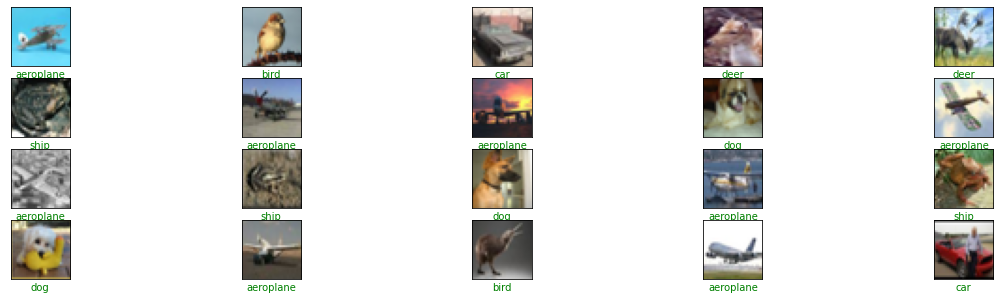

In [11]:
class_names = ['aeroplane', 'car', 'bird', 'cat', 'deer', 'dog', 'ship', 'truck']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 20, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(20,5))
    for i in range(20):
        plt.subplot(4,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_train, y_train, y_train)

In [90]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 4, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 4, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.3))
        return model
    
    model = tf.keras.Sequential()
    model.add(Input(shape=(32,32,3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    #model = add_conv_block(model, 256)
    
    model.add(Flatten())
    #model.add(Dense(128, activation='softmax'))
    model.add(Dense(8, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_298 (Conv2D)          (None, 32, 32, 32)        1568      
_________________________________________________________________
batch_normalization_169 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_299 (Conv2D)          (None, 29, 29, 32)        16416     
_________________________________________________________________
max_pooling2d_133 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_133 (Dropout)        (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_300 (Conv2D)          (None, 14, 14, 64)        32832     
_________________________________________________________________
batch_normalization_170 (Bat (None, 14, 14, 64)      

In [99]:
h = model.fit(x_train/255., y_train, validation_data=(x_test/255., y_test), 
              epochs=5, batch_size=128, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

Epoch 1/5
313/313 [==============================] - 4s 14ms/step - loss: 0.3806 - accuracy: 0.8649 - val_loss: 0.7843 - val_accuracy: 0.7630
Epoch 2/5
313/313 [==============================] - 4s 14ms/step - loss: 0.3603 - accuracy: 0.8713 - val_loss: 0.6451 - val_accuracy: 0.7993
Epoch 3/5
313/313 [==============================] - 4s 13ms/step - loss: 0.3179 - accuracy: 0.8863 - val_loss: 0.6413 - val_accuracy: 0.8035
Epoch 4/5
313/313 [==============================] - 4s 13ms/step - loss: 0.3071 - accuracy: 0.8905 - val_loss: 0.7022 - val_accuracy: 0.7943
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.2863 - accuracy: 0.8989 - val_loss: 0.6674 - val_accuracy: 0.8142


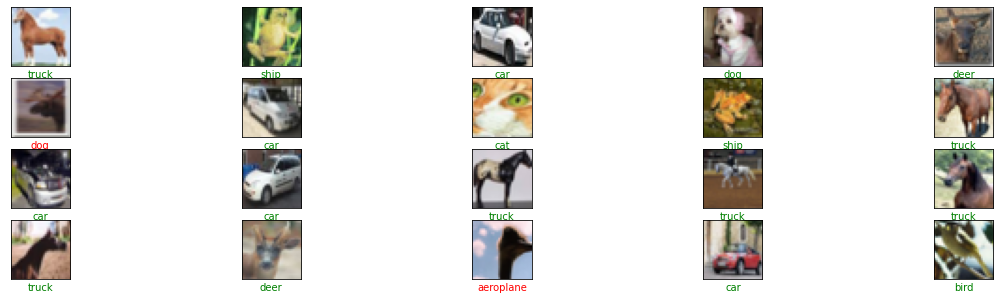

In [100]:
preds = model.predict(x_test/255.)
show_random_examples(x_test, y_test, preds)